#Preparing the data


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Train_Set="https://raw.githubusercontent.com/LeHoangViet03/Fintech-CYTech/main/Energy_Production_Train.csv"
df=pd.read_csv(Train_Set)
df.tail()



,UTC Time,Plant_ID,Energy_Production,Benchmark,Day-Night,Temperature descriptor,Comfort level,Visibility,Probability of precipitation for last hour,Rainfall amount for last hour,Dew point,Temperature,Wind direction,Precipitation descriptor,Sky descriptor,Humidity,Wind speed
176500,2021-04-30 18:00:00+00:00,15,0.001,0.001,D,8.0,17.40,4.0,50.0,0.10,13.4,17.4,218.0,5,16.0,78.0,7.20
176501,2021-04-30 19:00:00+00:00,15,0.000,0.000,N,6.0,16.50,4.0,44.0,0.07,13.3,16.5,241.0,5,16.0,82.0,7.20
176502,2021-04-30 20:00:00+00:00,15,0.000,0.000,N,6.0,15.60,4.0,39.0,0.06,13.1,15.6,12.0,4,16.0,85.0,7.20
176503,2021-04-30 21:00:00+00:00,15,0.000,0.000,N,6.0,15.18,4.0,34.0,0.05,13.0,15.2,17.0,4,15.0,87.0,7.56
176504,2021-04-30 22:00:00+00:00,15,0.000,0.000,N,6.0,14.66,4.0,33.0,0.04,12.7,14.7,18.0,4,15.0,88.0,7.20


In [6]:
if df.isna().any().any():
    print("The DataFrame contains missing values.")
else:
    print("The DataFrame does not contain any missing values.")

The DataFrame does not contain any missing values.


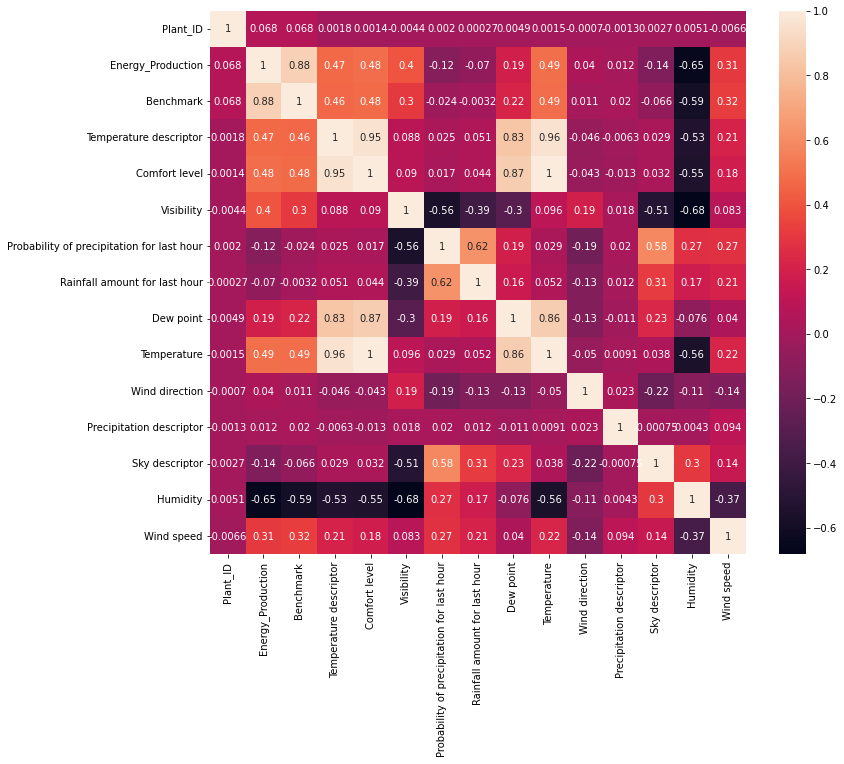

In [7]:
corr_matrix=df.corr()
fix,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

Plant_ID                                      0.067552
Benchmark                                     0.876011
Temperature descriptor                        0.467990
Comfort level                                 0.481825
Visibility                                    0.395889
Probability of precipitation for last hour   -0.115765
Rainfall amount for last hour                -0.069988
Dew point                                     0.187473
Temperature                                   0.488400
Wind direction                                0.040365
Precipitation descriptor                      0.011819
Sky descriptor                               -0.139862
Humidity                                     -0.649811
Wind speed                                    0.306496
Name: Energy_Production, dtype: float64


<ipython-input-8-72001c34e01b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(correlations.index, rotation=90)


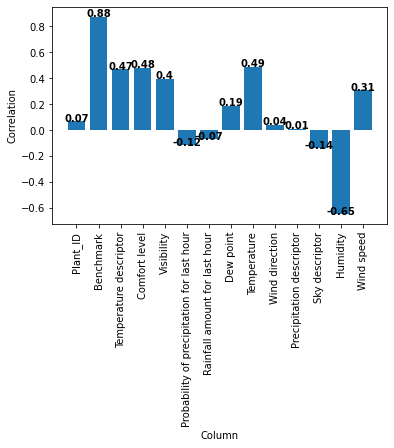

In [8]:
# Calculate the correlation between 'Energy_Production' and the other columns
correlations = df.corr()['Energy_Production']

# Drop the correlation value between 'Energy_Production' and itself
correlations = correlations.drop('Energy_Production')

# Print the correlations series
print(correlations)

# Create a bar chart of the correlations
fig, ax = plt.subplots()
ax.bar(correlations.index, correlations.values)
ax.set_xticklabels(correlations.index, rotation=90)
ax.set_xlabel('Column')
ax.set_ylabel('Correlation')

# Add labels to the top of each bar
for i, v in enumerate(correlations.values):
    ax.text(i, v, str(round(v, 2)), ha='center', fontweight='bold')

plt.show()




In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [10]:
df['UTC Time'] = pd.to_datetime(df['UTC Time'])
df = df.sort_values(by='UTC Time')
r2 = r2_score(df['Energy_Production'], df['Benchmark'])
print(r2)
df['month'] = df['UTC Time'].dt.month
df['day'] = df['UTC Time'].dt.day
df['hour'] = df['UTC Time'].dt.hour
df['lagged_onehour'] = df.groupby('Plant_ID')['Energy_Production'].shift(1)
# create lagged_day and lagged_week columns using shift() method
df['lagged_day'] = df.groupby('Plant_ID')['Energy_Production'].shift(24)
df['lagged_week'] = df.groupby('Plant_ID')['Energy_Production'].shift(24*7)

# create Mean_Day and STD columns using rolling() method
df['Mean_Day'] = df.groupby('Plant_ID')['Energy_Production'].rolling(window=24, min_periods=1).mean().shift(1).reset_index(0,drop=True)
df['STD'] = df.groupby('Plant_ID')['Energy_Production'].rolling(window=24, min_periods=1).std().shift(1).reset_index(0,drop=True)
df.dropna(inplace=True)
dummy_vars = pd.get_dummies(df['Day-Night'], prefix='DayNight')
df = pd.concat([df, dummy_vars], axis=1)
df = df.drop('Day-Night', axis=1)
# Sort the dataframe by some column (e.g. 'id')
df = df.drop(['Benchmark','UTC Time','Rainfall amount for last hour','Wind direction','Precipitation descriptor','Visibility','Temperature descriptor','Comfort level','DayNight_N','DayNight_D'], axis=1)
# Calculate the row index at which to split the dataframe
split_index = int(len(df) * 0.8)
energy_production_col = df.pop('Energy_Production')
df.insert(len(df.columns), 'Energy_Production', energy_production_col)
# Split the dataframe into train and validation sets
train_set = df[:split_index]
valid_set = df[split_index:]


# Get the input features and output features for train and validation sets
X_train = train_set.iloc[:, :-1]  # all columns except the last one
y_train = train_set.iloc[:, -1]   # last column only
X_valid = valid_set.iloc[:, :-1]  # all columns except the last one
y_valid = valid_set.iloc[:, -1]   # last column only
print(df.iloc[100:110])

0.7523535682544427
        Plant_ID  Probability of precipitation for last hour  Dew point  \
38739          4                                         0.0       -2.2   
61729          6                                         0.0       -2.2   
50234          5                                         0.0       -2.2   
130699        12                                         0.0       -2.2   
73224          7                                         0.0       -2.2   
96214          9                                         0.0       -2.2   
84719          8                                         0.0       -2.2   
23164          2                                         0.0       -2.2   
27244          3                                         0.0       -2.2   
165184        15                                         0.0       -2.2   

        Temperature  Sky descriptor  Humidity  Wind speed  month  day  hour  \
38739          -0.3             8.0      87.0        7.56      1   11     6 

In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [12]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_valid_scaled=scaler.transform(X_valid)


In [13]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
import tensorflow as tf
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.callbacks import EarlyStopping

MSE for XGBoost: 0.003242196331503819
R-squared score for XGBoost: 0.95097
R-squared score for XGBoost train: 0.96883
Index(['Plant_ID', 'Probability of precipitation for last hour', 'Dew point',
       'Temperature', 'Sky descriptor', 'Humidity', 'Wind speed', 'month',
       'day', 'hour', 'lagged_onehour', 'lagged_day', 'lagged_week',
       'Mean_Day', 'STD'],
      dtype='object')


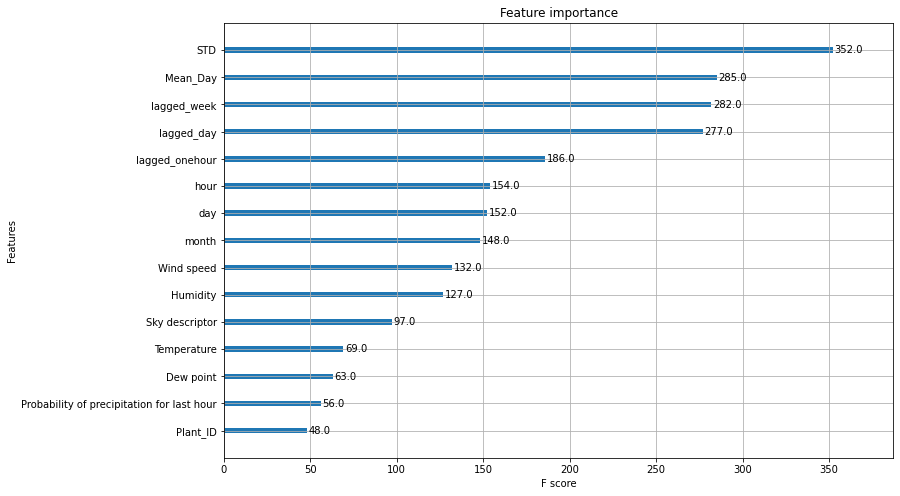

MSE for Light GBM: 0.0032527073771074044
R-squared score for Light GBM: 0.95065
MSE for Linear Regression: 0.004357186890408265
R-squared score for Linear Regression: 0.91144
R-squared score for Linear Regression but for traindata: 0.91884
Epoch 1/20
4346/4346 [==============================] - 13s 3ms/step - loss: 3.9282e-04 - val_loss: 4.5800e-05
Epoch 2/20
4346/4346 [==============================] - 10s 2ms/step - loss: 2.6790e-05 - val_loss: 6.1942e-05
Epoch 3/20
4346/4346 [==============================] - 11s 3ms/step - loss: 2.4378e-05 - val_loss: 3.5855e-05
Epoch 4/20
4346/4346 [==============================] - 10s 2ms/step - loss: 1.8779e-05 - val_loss: 2.1870e-05
Epoch 5/20
4346/4346 [==============================] - 11s 2ms/step - loss: 1.6562e-05 - val_loss: 2.3396e-05
Epoch 6/20
4346/4346 [==============================] - 12s 3ms/step - loss: 1.5659e-05 - val_loss: 1.6609e-05
Epoch 7/20
4346/4346 [==============================] - 10s 2ms/step - loss: 1.4890e-05 - val_

In [34]:
xgb_model=xgb.XGBRegressor(objective='reg:squarederror', n_estimators=104, learning_rate=0.078, max_depth=5)
xgb_model.fit(X_train_scaled, y_train)
y_pred=xgb_model.predict(X_valid_scaled)
y_train_pred=xgb_model.predict(X_train_scaled)
# Calculate R-squared score
mse = mean_squared_error(y_valid, y_pred,squared=False)
print('MSE for XGBoost:', mse)
r2 = r2_score(y_valid, y_pred)
print("R-squared score for XGBoost: {:.5f}".format(r2))
r2_train = r2_score(y_train, y_train_pred)
print("R-squared score for XGBoost train: {:.5f}".format(r2_train))
# Plot feature importance
feature_names = train_set.columns[:-1]
print(feature_names)
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(xgb_model, ax=ax)
ax.set_yticklabels(feature_names)
plt.show()
#Light GBM
lgb_model = LGBMRegressor(objective='regression', n_estimators=187, learning_rate=0.06, max_depth=7)
lgb_model.fit(X_train_scaled, y_train)
y_pred = lgb_model.predict(X_valid_scaled)
# Calculate R-squared score
mse = mean_squared_error(y_valid, y_pred,squared=False)
print('MSE for Light GBM:', mse)
r2 = r2_score(y_valid, y_pred)
print("R-squared score for Light GBM: {:.5f}".format(r2))
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_valid_scaled)
y_pred_train = lr_model.predict(X_train_scaled)
# Calculate R-squared score
mse = mean_squared_error(y_valid, y_pred,squared=False)
print('MSE for Linear Regression:', mse)
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_valid, y_pred)
print("R-squared score for Linear Regression: {:.5f}".format(r2))
print("R-squared score for Linear Regression but for traindata: {:.5f}".format(r2_train))
#Neural Network


model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid),shuffle=False)

y_pred = model.predict(X_valid_scaled)
mse=mean_squared_error(y_valid,y_pred,squared=False)
r2 = r2_score(y_valid, y_pred)
print("R-squared score: {:.5f}".format(r2))
print('MSE for NN:', mse)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


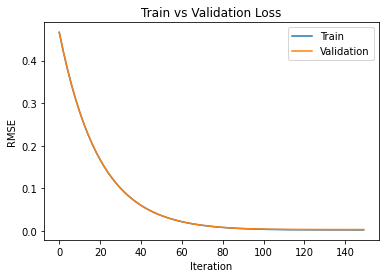

In [15]:
# Train the model and evaluate on validation set
eval_set = [(X_train_scaled, y_train), (X_valid_scaled, y_valid)]
xgb_model.fit(X_train_scaled, y_train, eval_set=eval_set, eval_metric="rmse", verbose=False)

# Get the train and validation loss
train_loss = xgb_model.evals_result()['validation_0']['rmse']
valid_loss = xgb_model.evals_result()['validation_1']['rmse']

# Plot the train and validation loss
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Train')
plt.plot(valid_loss, label='Validation')
plt.title('Train vs Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization


In [36]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

# Define the objective function to be maximized (i.e., negative RMSE)
def xgb_rmse(learning_rate, n_estimators, max_depth, subsample, colsample_bytree):
    # Convert hyperparameters to the appropriate types
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)

    # Train and evaluate XGBoost model with given hyperparameters
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                                 learning_rate=learning_rate, 
                                 n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 subsample=subsample, 
                                 colsample_bytree=colsample_bytree,
                                 random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Return negative RMSE since the optimizer minimizes the objective function
    return -rmse

# Define search space for hyperparameters
xgb_params = {'learning_rate': (0.01, 0.5),
              'n_estimators': (50, 200),
              'max_depth': (3, 10),
              'subsample': (0.5, 1),
              'colsample_bytree': (0.5, 1)}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2,shuffle=False)

# Perform Bayesian optimization
xgb_bo = BayesianOptimization(f=xgb_rmse, pbounds=xgb_params, verbose=2, random_state=42)
xgb_bo.maximize(init_points=10, n_iter=20)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", xgb_bo.max['params'])
print("Best RMSE: {:.5f}".format(-xgb_bo.max['target']))

# Get the best hyperparameters
best_params = xgb_bo.max['params']

# Convert the number of estimators and max_depth to integer values
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])

# Train the XGBoost model on the entire training set using the best hyperparameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
xgb_model.fit(X_train, y_train)












|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | -0.003781 | 0.6873    | 0.4759    | 8.124     | 139.8     | 0.578     |
| 2         | -0.003904 | 0.578     | 0.03846   | 9.063     | 140.2     | 0.854     |
| 3         | -0.003935 | 0.5103    | 0.4853    | 8.827     | 81.85     | 0.5909    |
| 4         | -0.00333  | 0.5917    | 0.1591    | 6.673     | 114.8     | 0.6456    |
| 5         | -0.003226 | 0.8059    | 0.07835   | 5.045     | 105.0     | 0.728     |
| 6         | -0.003266 | 0.8926    | 0.1078    | 6.6       | 138.9     | 0.5232    |
| 7         | -0.003265 | 0.8038    | 0.09356   | 3.455     | 192.3     | 0.9828    |
| 8         | -0.003254 | 0.9042    | 0.1593    | 3.684     | 152.6     | 0.7201    |
| 9         | -0.003325 | 0.561     | 0.2526    | 3.241     | 186.4     | 0.6294    |
| 10        | -0.003363 | 0.8313    | 0.1627    | 6.64

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8059264473611898, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0783519917195005,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=104, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [88]:
import matplotlib
from datetime import datetime
from matplotlib.dates import DateFormatter

0.6256232175520304
MSE for XGBoost: 0.0031787215553446923
R-squared score for XGBoost: 0.96551


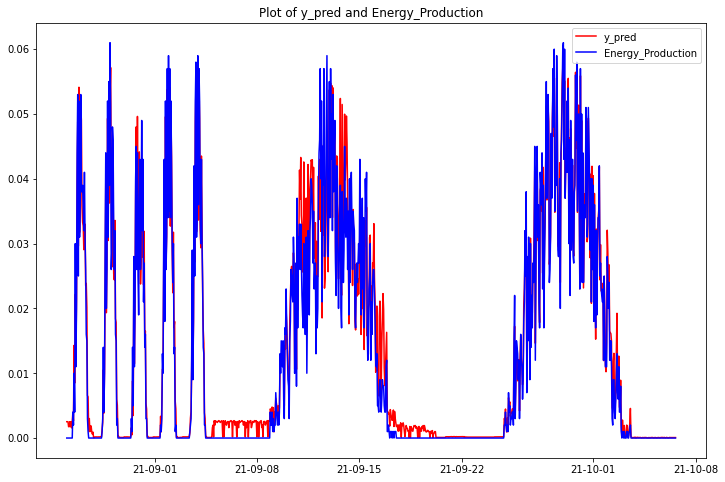

In [91]:
test_set='https://raw.githubusercontent.com/LeHoangViet03/Fintech-CYTech/main/Energy_Production_Test.csv'

dg=pd.read_csv(test_set)
Time=dg['UTC Time']
dg['UTC Time'] = pd.to_datetime(dg['UTC Time'])
dg = dg.sort_values(by='UTC Time')
dg['month'] = dg['UTC Time'].dt.month
dg['day'] = dg['UTC Time'].dt.day
dg['hour'] = dg['UTC Time'].dt.hour
dg['lagged_onehour'] = dg.groupby('Plant_ID')['Energy_Production'].shift(1)

# create lagged_day and lagged_week columns using shift() method
dg['lagged_day'] = dg.groupby('Plant_ID')['Energy_Production'].shift(24)
dg['lagged_week'] = dg.groupby('Plant_ID')['Energy_Production'].shift(24*7)
r2_benchmark=r2_score(dg['Benchmark'],dg['Energy_Production'])
print(r2_benchmark)
# create Mean_Day and STD columns using rolling() method
dg['Mean_Day'] = df.groupby('Plant_ID')['Energy_Production'].rolling(window=24, min_periods=1).mean().shift(1).reset_index(0,drop=True)
dg['STD'] = df.groupby('Plant_ID')['Energy_Production'].rolling(window=24, min_periods=1).std().shift(1).reset_index(0,drop=True)
dg.dropna(inplace=True)
dummy_vars = pd.get_dummies(dg['Day-Night'], prefix='DayNight')
dg = pd.concat([dg, dummy_vars], axis=1)
dg = dg.drop('Day-Night', axis=1)
# Sort the dataframe by some column (e.g. 'id')
dg = dg.drop(['Benchmark','UTC Time','Rainfall amount for last hour','Wind direction','Precipitation descriptor','Visibility','Temperature descriptor','Comfort level','DayNight_N','DayNight_D'], axis=1)
# Calculate the row index at which to split the dataframe
split_index = int(len(dg) *1)

# Split the dataframe into train and validation sets
test_set = dg[:split_index]

# Get the energy production values for train and validation sets
energy_production_test = test_set.pop('Energy_Production')
# Insert the energy production values back to train and validation sets
test_set.insert(len(test_set.columns), 'Energy_Production', energy_production_test)

# Get the input features and output features for train and validation sets
X_test = test_set.iloc[:, :-1]  # all columns except the last one
y_test = test_set.iloc[:, -1]   # last column only
X_first_1000 = X_test.iloc[:1000]
y_first_1000 = y_test.iloc[:1000]
y_pred=xgb_model.predict(X_first_1000)
# Calculate R-squared score
mse = mean_squared_error(y_first_1000, y_pred,squared=False)
print('MSE for XGBoost:', mse)
r2 = r2_score(y_first_1000, y_pred)
print("R-squared score for XGBoost: {:.5f}".format(r2))
Time_first=pd.to_datetime(Time[:1000])
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(Time_first, y_pred, color='red', label='y_pred')
plt.plot(Time_first, y_first_1000, color='blue', label='Energy_Production')

date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.title('Plot of y_pred and Energy_Production')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()